##### 開啟圖片轉檔儲存 ( 可調整品質與尺寸 )
這篇教學會將 PyQt5 結合 Pillow 第三方函式庫，實作一個可以開啟並預覽圖片，並調整圖片尺寸，轉存為其他檔案格式的功能。

##### 預計畫面功能與效果 
要實作一個「開啟圖片轉檔儲存」的功能，大概需要有下列幾種要素：
* 開新檔案、另存檔案和關閉的按鈕。
* 預覽圖片的空白畫布。
* 調整圖片尺寸的調整元件。
* 選擇儲存格式為 JPG 時的壓縮比調整滑桿。

透過這幾種要素的組合，預期可以得到下圖一樣的效果，接下來就準備按照下圖進行實作：

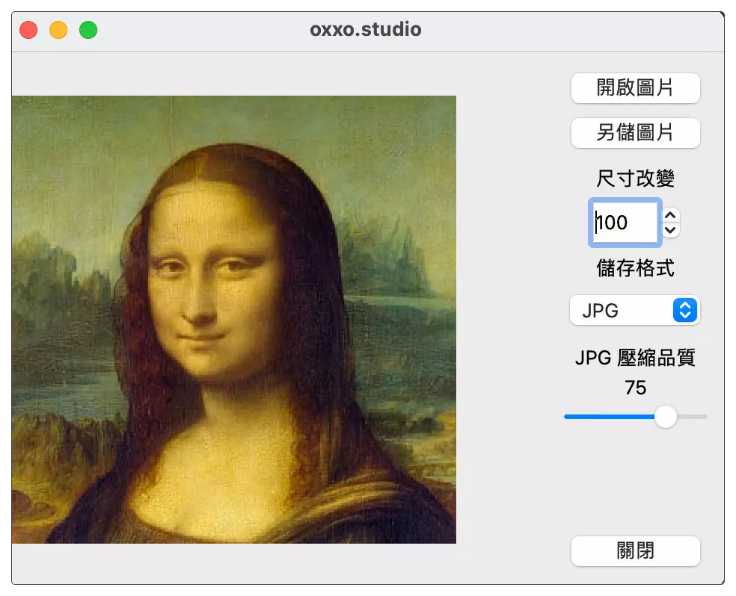

##### 開啟並顯示圖片 
參考「QFileDialog 選擇檔案對話視窗」和「QLabel 標籤」教學範例，在畫面中放入顯示圖片的畫布 ( QPixmap 元件 )，\
以及三顆各具功能 ( 開啟圖片、另存圖片、關閉 )的按鈕，點擊開啟圖片的按鈕之後，會先彈出檔案選取視窗，\
選擇檔案後會出現對話視窗進行再次詢問，確認後就會將圖片開啟在 QPixmap 的畫布裡，同時額外將圖片儲存在看不見的 Pillow 圖片元件中。

* 因為開啟在 QPixmap 裡的圖片長寬已經發生變化，加上最後需要使用 Pillow，所以額外產生一個 Pillow 圖片元件放置原始圖片資訊。

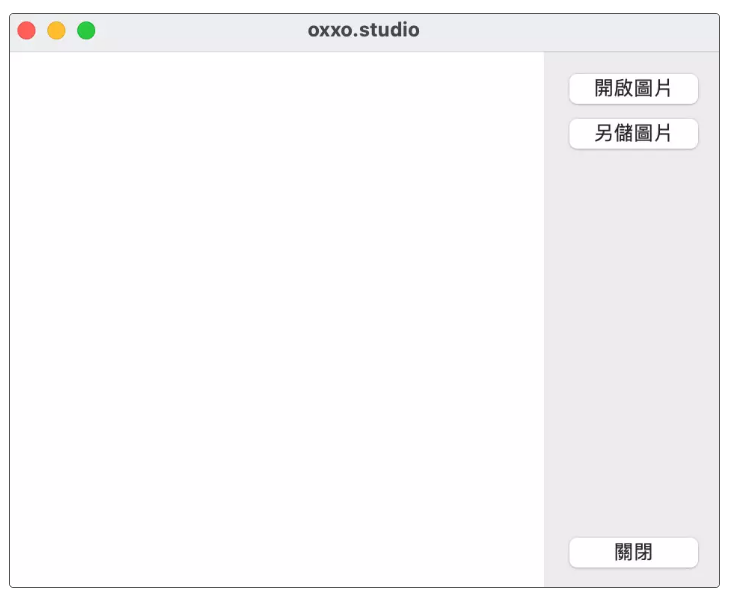

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import sys
from PIL import Image

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(480, 360)

canvas = QPixmap(360,360)            # 建立 QPixmap 畫布元件
canvas.fill(QColor('#ffffff'))       # 預設填滿白色

label = QtWidgets.QLabel(MainWindow) # 建立 QLabel
label.setGeometry(0, 0, 360, 360)    # 設定大小和位置
label.setPixmap(canvas)              # 放入 QPixmap

mbox = QtWidgets.QMessageBox(MainWindow)  # 建立對話視窗元件

# 開新檔案的函式
def newFile():
    global img    # 新增全域變數 img
    # 開啟檔案時限制為 jpg、png 和 gif 的圖片格式
    filePath , filetype = QtWidgets.QFileDialog.getOpenFileName(filter='IMAGE(*.jpg *.png *.gif)')
    # 如果開啟檔案
    if filePath:
        ret = mbox.question(MainWindow, 'question', '確定開新檔案？')  # 彈出對話視窗詢問是否開啟
        # 如果點選 yes
        if ret == mbox.Yes:
            img = Image.open(filePath)       # 建立 Pillow 圖片元件紀錄圖片資訊
            label.pixmap().load(filePath)    # 將圖片開啟到 QPixmap 畫布裡
            MainWindow.update()              # 更新視窗內容
        else:
            return

# 關閉視窗的函式
def closeFile():
    app.quit()

btn_open = QtWidgets.QPushButton(MainWindow)  # 開啟圖片按鈕
btn_open.setText('開啟圖片')
btn_open.setGeometry(370, 10, 100, 30)
btn_open.clicked.connect(newFile)             # 點擊按鈕的動作

btn_save = QtWidgets.QPushButton(MainWindow)  # 另存圖片按鈕
btn_save.setText('另儲圖片')
btn_save.setGeometry(370, 40, 100, 30)

btn_close = QtWidgets.QPushButton(MainWindow)  # 關閉視窗的按鈕
btn_close.setText('關閉')
btn_close.setGeometry(370, 320, 100, 30)
btn_close.clicked.connect(closeFile)           # 點擊按鈕的動作

MainWindow.show()
sys.exit(app.exec_())

##### 加入尺寸調整功能 
延續上述的程式，在主程式裡加入下面的程式碼，執行後就會出現可以調整尺寸數值的元件。

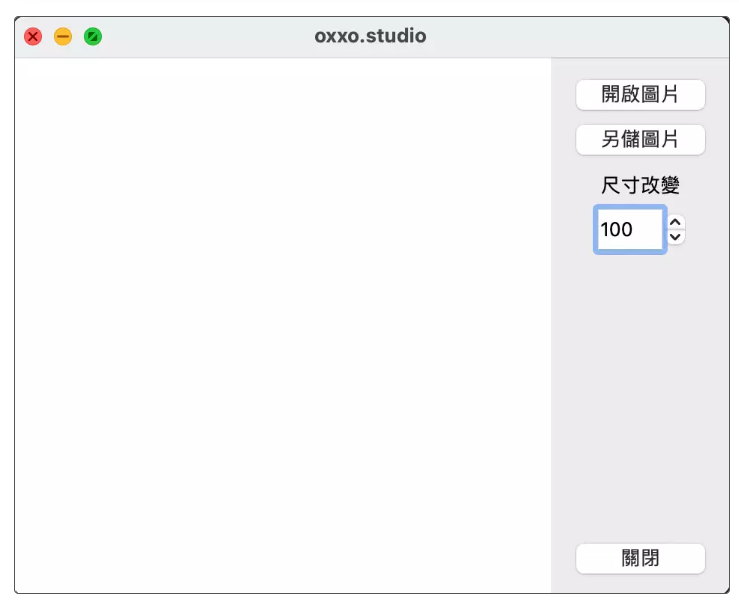

In [ ]:
label_size = QtWidgets.QLabel(MainWindow)   # 加入說明文字 QLabel
label_size.setGeometry(370, 70, 100, 30)
label_size.setText('尺寸改變')
label_size.setAlignment(Qt.AlignCenter)

size =100                    # 預設尺寸 100%
# 改變尺寸的函式
def changeSize():
    global size
    size = box_size.value()  # 取得數值調整元件的數值

box_size = QtWidgets.QSpinBox(MainWindow)  # 建立數值調整元件
box_size.setGeometry(390, 100, 60, 30)     # 設定位置
box_size.setRange(0,200)                   # 設定調整範圍
box_size.setValue(size)                    # 設定預設值
box_size.valueChanged.connect(changeSize)  # 數值改變時連動的函式

##### 加入 JPG 壓縮品質滑桿 
延續上述的程式，在主程式裡加入下面的程式碼，執行後就會出現存檔格式的選項，當選擇 JPG 時可以設定壓縮品質 ( 預設 75 )，\
如果選擇 PNG 則會停用 JPG 壓縮品質的調整功能。

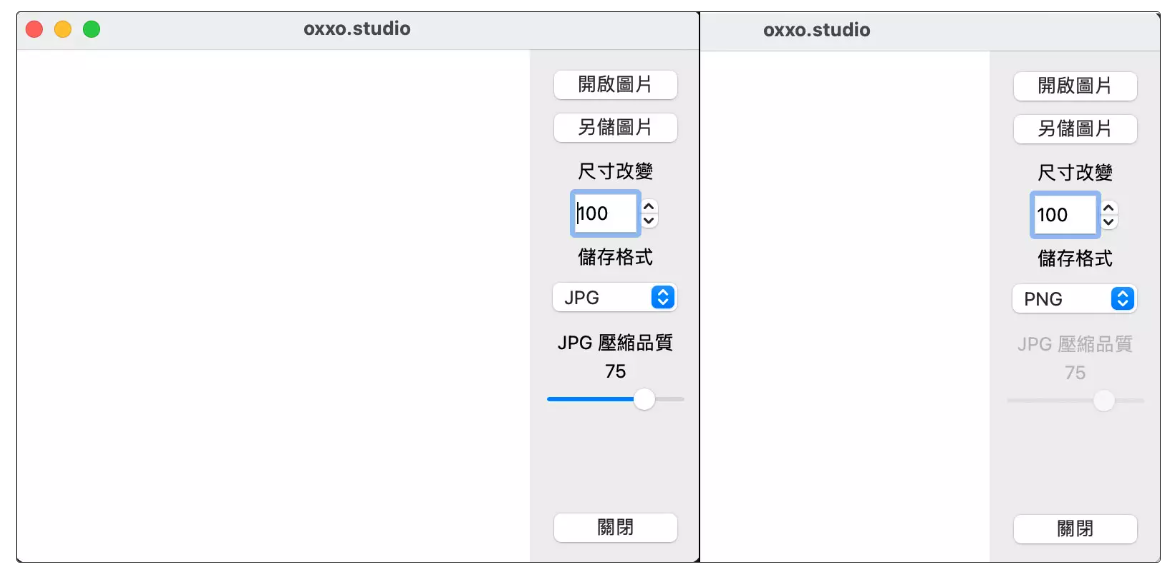

In [ ]:
label_format = QtWidgets.QLabel(MainWindow)   # 說明文字 QLabel
label_format .setGeometry(370, 130, 100, 30)
label_format .setText('儲存格式')
label_format .setAlignment(Qt.AlignCenter)

format = 'JPG'        # 預設壓縮格式
# 改變壓縮格式時的函式
def changeFormat():
    global format
    format = box_format.currentText()     # 取得選擇的壓縮格式
    if format == 'JPG':
        label_jpg.setDisabled(False)      # 如果是 JPG，啟用 JPG 壓縮說明文字
        label_jpg_val.setDisabled(False)  # 如果是 JPG，啟用壓縮數值顯示
        slider.setDisabled(False)         # 如果是 JPG，啟用滑桿
    else:
        label_jpg.setDisabled(True)       # 如果不是 JPG，停用 JPG 壓縮說明文字
        label_jpg_val.setDisabled(True)   # 如果不是 JPG，停用壓縮數值顯示
        slider.setDisabled(True)          # 如果不是 JPG，停用滑桿

box_format  = QtWidgets.QComboBox(MainWindow)   # 格式下拉選單
box_format .addItems(['JPG','PNG'])             # 兩種選擇格式
box_format .setGeometry(370,160,100,30)
box_format .currentIndexChanged.connect(changeFormat)  # 切換時連動函式

label_jpg = QtWidgets.QLabel(MainWindow)  # JPG 壓縮說明文字
label_jpg.setGeometry(370, 190, 100, 30)
label_jpg.setText('JPG 壓縮品質')
label_jpg.setAlignment(Qt.AlignCenter)

val = 75   # 預設壓縮數值

label_jpg_val = QtWidgets.QLabel(MainWindow)  # 壓縮數值顯示
label_jpg_val.setGeometry(370, 210, 100, 30)
label_jpg_val.setText(str(val))
label_jpg_val.setAlignment(Qt.AlignCenter)
# 顯示壓縮數值的函式
def show():
    global val
    val = slider.value()     # 取得滑桿數值
    label_jpg_val.setText(str(slider.value()))  # 顯示滑桿數值

slider = QtWidgets.QSlider(MainWindow)   # 建立滑桿元件
slider.setOrientation(1)                 # 水平顯示
slider.setGeometry(370,230,100,30)
slider.setRange(0, 100)                  # 調整範圍
slider.setValue(val)                     # 預設值
slider.valueChanged.connect(show)        # 連動壓縮數值顯示函式

##### 完成存檔功能 
最後加入另存新檔的函式，並將另存新檔的按鈕連動該函式，存檔時彈出檔案視窗，並透過 Pillow 函式庫進行存檔作業。

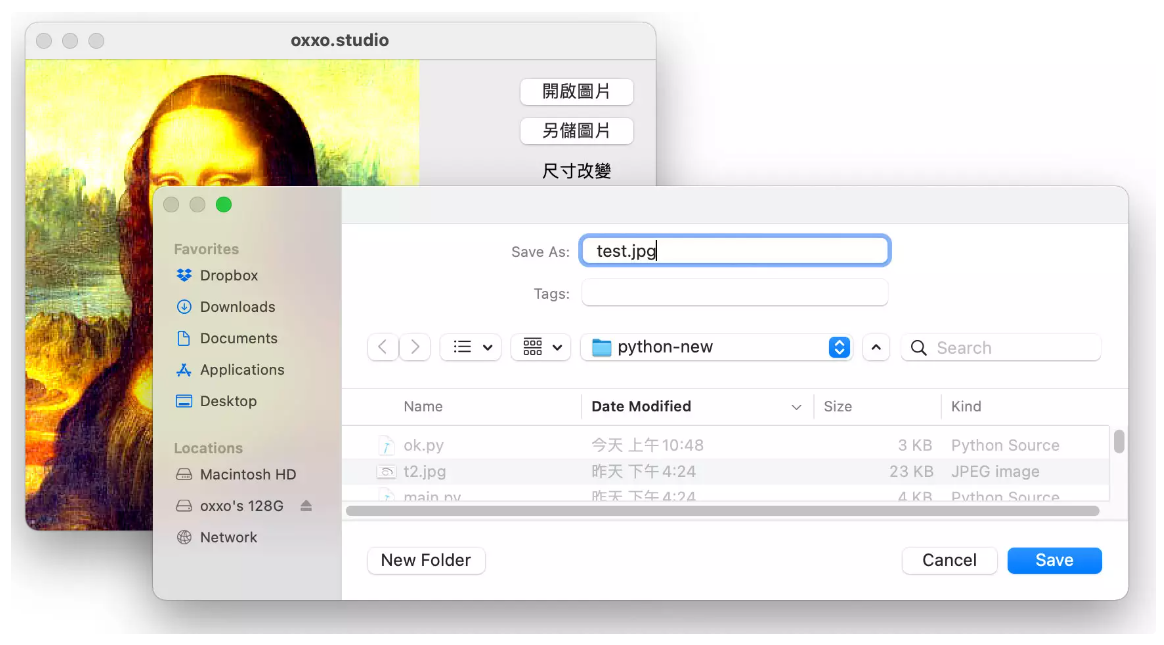

In [ ]:
# 存檔函式
def saveFile():
    global format, val, img, size
    # 如果格式為 JPG
    if format == 'JPG':
        # 限制只能存 JPG
        filePath, filterType = QtWidgets.QFileDialog.getSaveFileName(filter='JPG(*.jpg)')
        # 如果確定存檔
        if filePath:
            # 根據尺寸調整數值設定尺寸
            nw = int ( img.size[0] * size/100 )
            nh = int ( img.size[1] * size/100 )
            img2 = img.resize((nw, nh))
            # 使用 Pillow 函式庫存檔
            img2.save(filePath, quality=val, subsampling=0)
    else:
        # 限制只能存 PNG
        filePath, filterType = QtWidgets.QFileDialog.getSaveFileName(filter='PNG(*.png)')
        if filePath:
            # 根據尺寸調整數值設定尺寸
            nw = int ( img.size[0] * size/100 )
            nh = int ( img.size[1] * size/100 )
            img2 = img.resize((nw, nh))
            # 使用 Pillow 函式庫存檔
            img2.save(filePath, 'png')

def closeFile():
    app.quit()

mbox = QtWidgets.QMessageBox(MainWindow)

btn_open = QtWidgets.QPushButton(MainWindow)
btn_open.setText('開啟圖片')
btn_open.setGeometry(370, 10, 100, 30)
btn_open.clicked.connect(newFile)

btn_save = QtWidgets.QPushButton(MainWindow)
btn_save.setText('另儲圖片')
btn_save.setGeometry(370, 40, 100, 30)
btn_save.clicked.connect(saveFile)      # 連動存檔函式

##### 完整程式碼 
一般寫法：

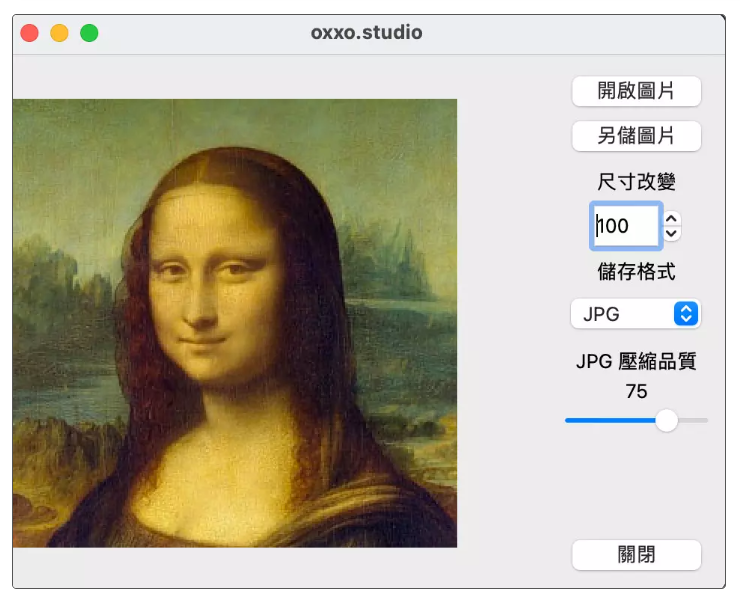

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import sys
from PIL import Image

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(480, 360)

canvas = QPixmap(360,360)
canvas.fill(QColor('#ffffff'))

label = QtWidgets.QLabel(MainWindow)
label.setGeometry(0, 0, 360, 360)
label.setPixmap(canvas)

def newFile():
    global img
    filePath , filetype = QtWidgets.QFileDialog.getOpenFileName(filter='IMAGE(*.jpg *.png *.gif)')
    if filePath:
        ret = mbox.question(MainWindow, 'question', '確定開新檔案？')
        if ret == mbox.Yes:
            img = Image.open(filePath)
            label.pixmap().load(filePath)
            MainWindow.update()
        else:
            return

def saveFile():
    global format, val, img, size
    if format == 'JPG':
        filePath, filterType = QtWidgets.QFileDialog.getSaveFileName(filter='JPG(*.jpg)')
        if filePath:
            nw = int ( img.size[0] * size/100 )
            nh = int ( img.size[1] * size/100 )
            img2 = img.resize((nw, nh))
            img2.save(filePath, quality=val, subsampling=0)
    else:
        filePath, filterType = QtWidgets.QFileDialog.getSaveFileName(filter='PNG(*.png)')
        if filePath:
            nw = int ( img.size[0] * size/100 )
            nh = int ( img.size[1] * size/100 )
            img2 = img.resize((nw, nh))
            img2.save(filePath, 'png')

def closeFile():
    app.quit()

mbox = QtWidgets.QMessageBox(MainWindow)

btn_open = QtWidgets.QPushButton(MainWindow)
btn_open.setText('開啟圖片')
btn_open.setGeometry(370, 10, 100, 30)
btn_open.clicked.connect(newFile)

btn_save = QtWidgets.QPushButton(MainWindow)
btn_save.setText('另儲圖片')
btn_save.setGeometry(370, 40, 100, 30)
btn_save.clicked.connect(saveFile)

btn_close = QtWidgets.QPushButton(MainWindow)
btn_close.setText('關閉')
btn_close.setGeometry(370, 320, 100, 30)
btn_close.clicked.connect(closeFile)

label_size = QtWidgets.QLabel(MainWindow)
label_size.setGeometry(370, 70, 100, 30)
label_size.setText('尺寸改變')
label_size.setAlignment(Qt.AlignCenter)

size =100
def changeSize():
    global size
    size = box_size.value()

box_size = QtWidgets.QSpinBox(MainWindow)
box_size.setGeometry(390, 100, 60, 30)
box_size.setRange(0,200)
box_size.setValue(size)
box_size.valueChanged.connect(changeSize)


label_format = QtWidgets.QLabel(MainWindow)
label_format .setGeometry(370, 130, 100, 30)
label_format .setText('儲存格式')
label_format .setAlignment(Qt.AlignCenter)

format = 'JPG'

def changeFormat():
    global format
    format = box_format.currentText()
    if format == 'JPG':
        label_jpg.setDisabled(False)
        label_jpg_val.setDisabled(False)
        slider.setDisabled(False)
    else:
        label_jpg.setDisabled(True)
        label_jpg_val.setDisabled(True)
        slider.setDisabled(True)

box_format  = QtWidgets.QComboBox(MainWindow)
box_format .addItems(['JPG','PNG'])
box_format .setGeometry(370,160,100,30)
box_format .currentIndexChanged.connect(changeFormat)

label_jpg = QtWidgets.QLabel(MainWindow)
label_jpg.setGeometry(370, 190, 100, 30)
label_jpg.setText('JPG 壓縮品質')
label_jpg.setAlignment(Qt.AlignCenter)

val = 75

label_jpg_val = QtWidgets.QLabel(MainWindow)
label_jpg_val.setGeometry(370, 210, 100, 30)
label_jpg_val.setText(str(val))
label_jpg_val.setAlignment(Qt.AlignCenter)

def show():
    global val
    val = slider.value()
    label_jpg_val.setText(str(slider.value()))

slider = QtWidgets.QSlider(MainWindow)
slider.setOrientation(1)
slider.setGeometry(370,230,100,30)
slider.setRange(0, 100)
slider.setValue(val)
slider.valueChanged.connect(show)

MainWindow.show()
sys.exit(app.exec_())

使用 class 的寫法 ( 需要注意將 show 改成 showVal，size 改成 sizeVal，避免和預設的方法衝突 )：

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import sys
from PIL import Image

class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('oxxo.studio')  # 设置窗口标题
        self.resize(480, 360)  # 设置窗口大小
        # 初始化界面组件
        self.ui()
        self.resizeUi()
        self.formatUi()

    def ui(self):
        # 创建一个画布，并设置背景颜色为白色
        self.canvas = QPixmap(360,360)
        self.canvas.fill(QColor('#ffffff'))
        # 创建一个标签，并设置其位置，用于显示画布
        self.label = QtWidgets.QLabel(self)
        self.label.setGeometry(0, 0, 360, 360)
        self.label.setPixmap(self.canvas)
        # 弹窗消息框初始化
        self.mbox = QtWidgets.QMessageBox(self)

        # 创建“开启图片”按钮，并连接到新文件打开函数
        self.btn_open = QtWidgets.QPushButton(self)
        self.btn_open.setText('開啟圖片')
        self.btn_open.setGeometry(370, 10, 100, 30)
        self.btn_open.clicked.connect(self.newFile)

        # 创建“另存图片”按钮，并连接到保存文件函数
        self.btn_save = QtWidgets.QPushButton(self)
        self.btn_save.setText('另儲圖片')
        self.btn_save.setGeometry(370, 40, 100, 30)
        self.btn_save.clicked.connect(self.saveFile)

        # 创建“关闭”按钮，并连接到关闭文件函数
        self.btn_close = QtWidgets.QPushButton(self)
        self.btn_close.setText('關閉')
        self.btn_close.setGeometry(370, 320, 100, 30)
        self.btn_close.clicked.connect(self.closeFile)

    def resizeUi(self):
        # 设置图片尺寸调整接口
        self.imgsize = 100  # 初始化图片大小百分比
        self.label_size = QtWidgets.QLabel(self)
        self.label_size.setGeometry(370, 70, 100, 30)
        self.label_size.setText('尺寸改變')
        self.label_size.setAlignment(Qt.AlignCenter)

        # 创建一个SpinBox用于调整图片大小
        self.box_size = QtWidgets.QSpinBox(self)
        self.box_size.setGeometry(390, 100, 60, 30)
        self.box_size.setRange(0, 200)  # 设置可选范围
        self.box_size.setValue(self.imgsize)  # 设置初始值
        self.box_size.valueChanged.connect(self.changeSize)  # 连接调整大小的函数

    def formatUi(self):
        # 设置图片格式选择接口
        self.label_format = QtWidgets.QLabel(self)
        self.label_format.setGeometry(370, 130, 100, 30)
        self.label_format.setText('儲存格式')
        self.label_format.setAlignment(Qt.AlignCenter)

        # 初始化当前格式为JPG
        self.format = 'JPG'

        # 创建下拉列表选择格式
        self.box_format = QtWidgets.QComboBox(self)
        self.box_format.addItems(['JPG', 'PNG'])
        self.box_format.setGeometry(370, 160, 100, 30)
        self.box_format.currentIndexChanged.connect(self.changeFormat)

        # 设置JPG压缩质量调整接口
        self.label_jpg = QtWidgets.QLabel(self)
        self.label_jpg.setGeometry(370, 190, 100, 30)
        self.label_jpg.setText('JPG 壓縮品質')
        self.label_jpg.setAlignment(Qt.AlignCenter)

        self.val = 75  # 初始化压缩质量

        self.label_jpg_val = QtWidgets.QLabel(self)
        self.label_jpg_val.setGeometry(370, 210, 100, 30)
        self.label_jpg_val.setText(str(self.val))
        self.label_jpg_val.setAlignment(Qt.AlignCenter)

        # 创建滑动条调整JPG压缩质量
        self.slider = QtWidgets.QSlider(self)
        self.slider.setOrientation(Qt.Horizontal)
        self.slider.setGeometry(370, 230, 100, 30)
        self.slider.setRange(0, 100)  # 范围从0到100
        self.slider.setValue(self.val)  # 初始值
        self.slider.valueChanged.connect(self.showVal)  # 连接显示值的函数

    # 打开文件的函数
    def newFile(self):
        filePath, filetype = QtWidgets.QFileDialog.getOpenFileName(filter='IMAGE(*.jpg *.png *.gif)')
        if filePath:
            ret = self.mbox.question(self, 'question', '確定開新檔案？')
            if ret == self.mbox.Yes:
                self.img = Image.open(filePath)  # 使用PIL打开图片
                self.label.pixmap().load(filePath)  # 加载图片到标签
                self.update()

    # 保存文件的函数
    def saveFile(self):
        if self.format == 'JPG':
            filePath, filterType = QtWidgets.QFileDialog.getSaveFileName(filter='JPG(*.jpg)')
            if filePath:
                nw = int(self.img.size[0] * self.imgsize / 100)  # 根据尺寸调整计算新宽度
                nh = int(self.img.size[1] * self.imgsize / 100)  # 计算新高度
                img2 = self.img.resize((nw, nh))  # 调整图片大小
                img2.save(filePath, quality=self.val, subsampling=0)  # 保存为JPG格式
        else:
            filePath, filterType = QtWidgets.QFileDialog.getSaveFileName(filter='PNG(*.png)')
            if filePath:
                nw = int(self.img.size[0] * self.imgsize / 100)
                nh = int(self.img.size[1] * self.imgsize / 100)
                img2 = self.img.resize((nw, nh))
                img2.save(filePath, 'PNG')  # 保存为PNG格式

    # 关闭文件的函数
    def closeFile(self):
        app.quit()

    # 更改图片大小的函数
    def changeSize(self):
        self.imgsize = self.box_size.value()

    # 更改保存格式的函数
    def changeFormat(self):
        self.format = self.box_format.currentText()
        if self.format == 'JPG':
            self.label_jpg.setDisabled(False)
            self.label_jpg_val.setDisabled(False)
            self.slider.setDisabled(False)
        else:
            self.label_jpg.setDisabled(True)
            self.label_jpg_val.setDisabled(True)
            self.slider.setDisabled(True)

    # 显示当前JPG压缩质量的函数
    def showVal(self):
        self.val = self.slider.value()
        self.label_jpg_val.setText(str(self.slider.value()))

if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    Form = MyWidget()
    Form.show()
    sys.exit(app.exec_())